<a href="https://colab.research.google.com/github/amarce-mc/PROM_M-M-todo-de-ra-ces/blob/main/PROM_M_M%C3%A9todo_de_raices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analisis de un sistema de control utilizando el método de lugar de raices con ayuda de la inteligencia artificial (ChatGPT)** \\
El objetivo de este ejercicio es mirar como la inteligencia artificial (IA) es una herramienta que además de ayudarnos con nuestras dudas a través de preguntas especificas, nos facilita el translado de un entorno de programación a otro que puede ser mas asequible como es el caso de MATLAB a Python. \\
En primera instancia se utilizó la inteligencia artifical para conocer conceptos primordiales sobre un sistema de control.

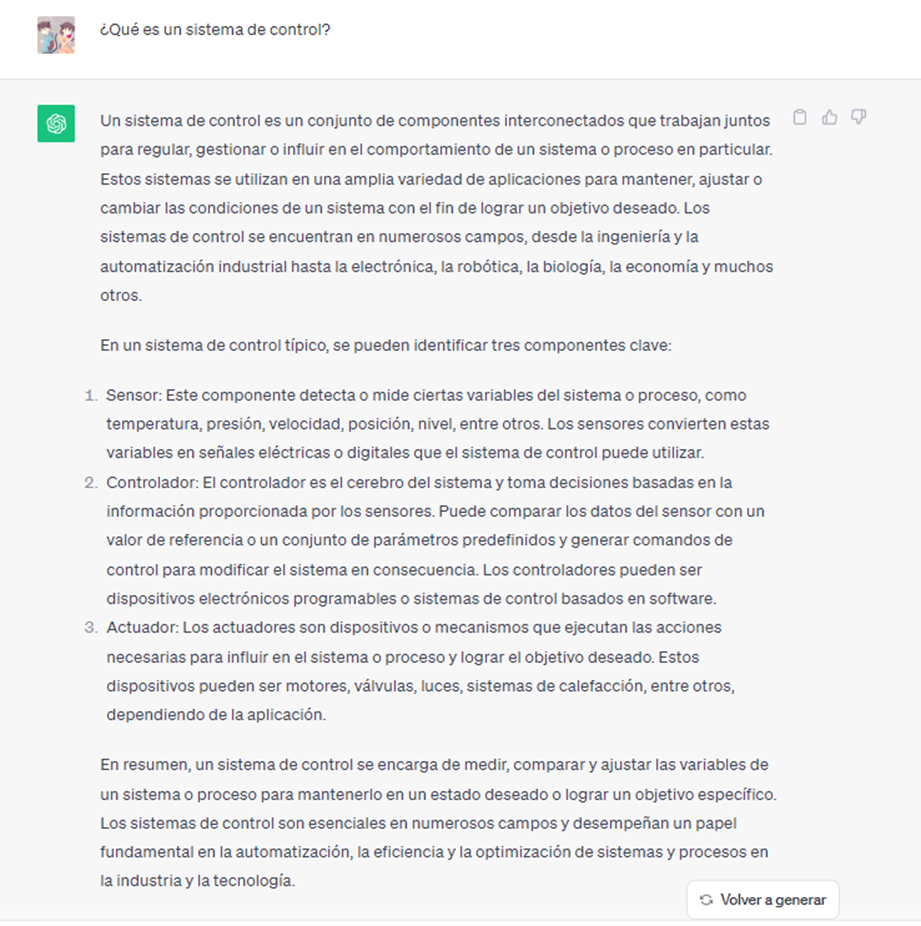

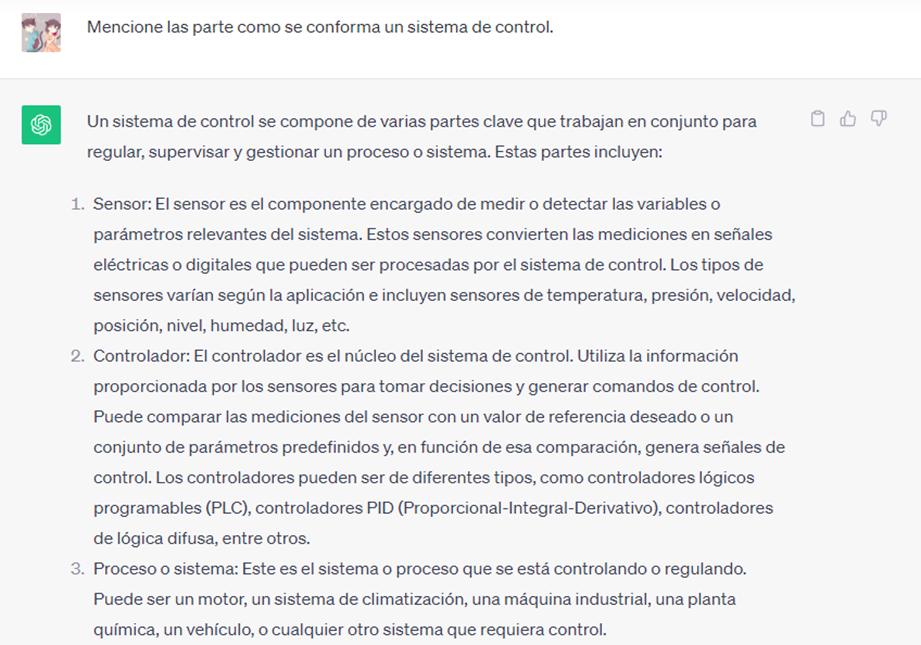
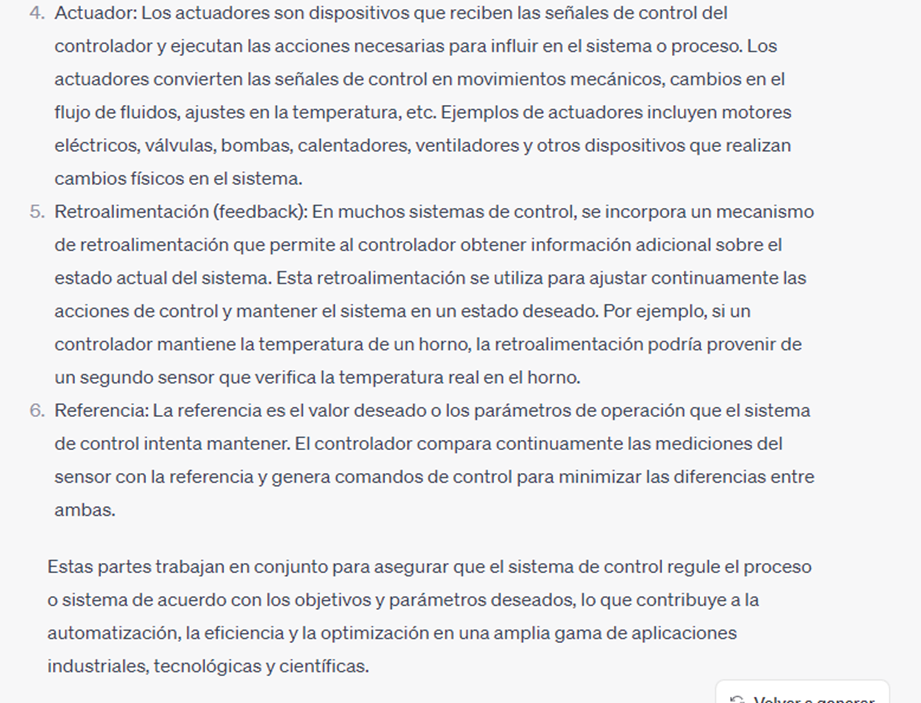

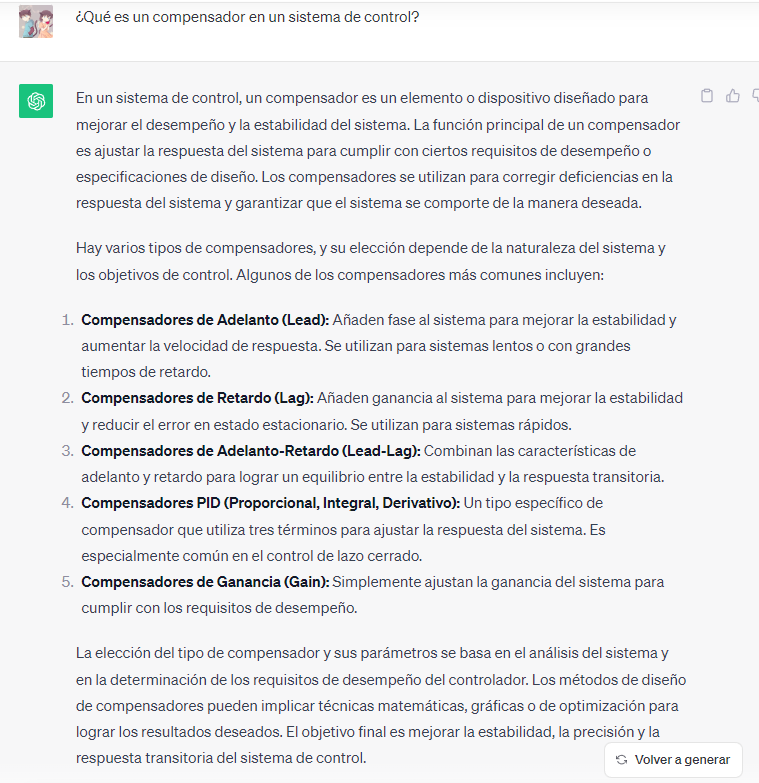

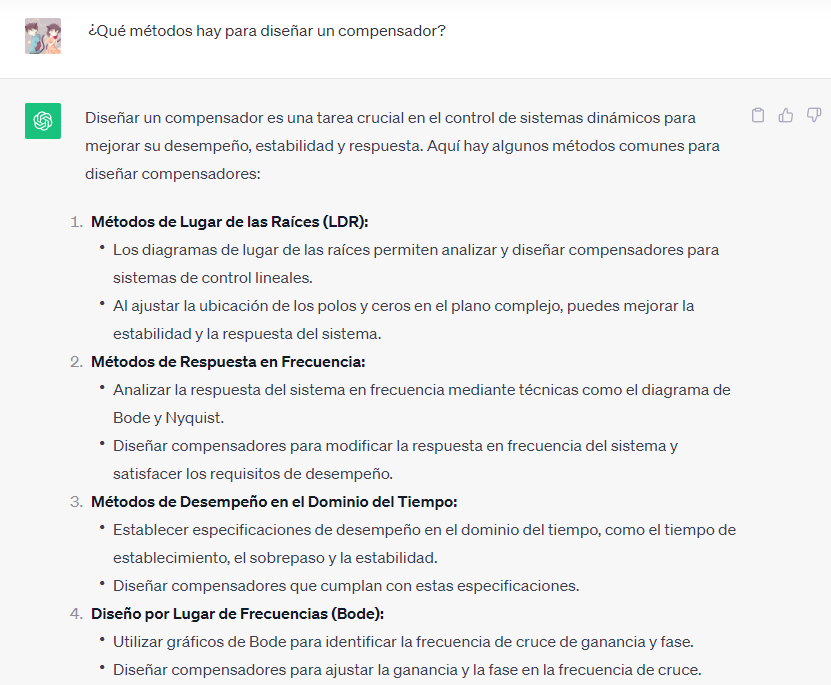
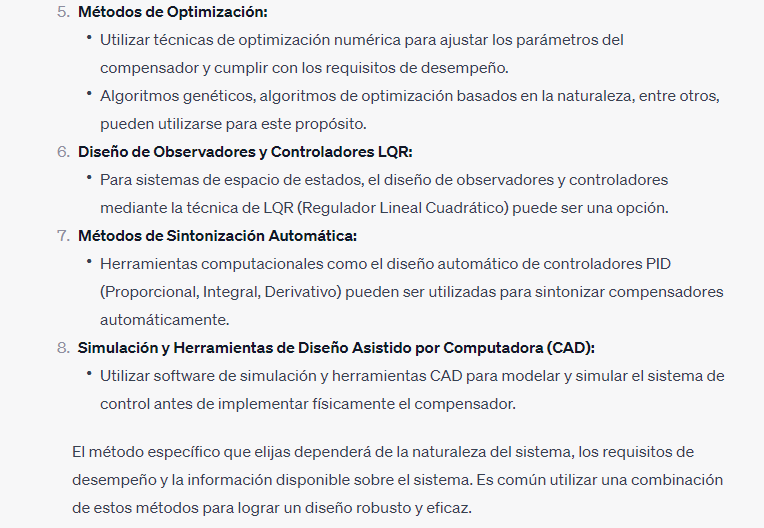

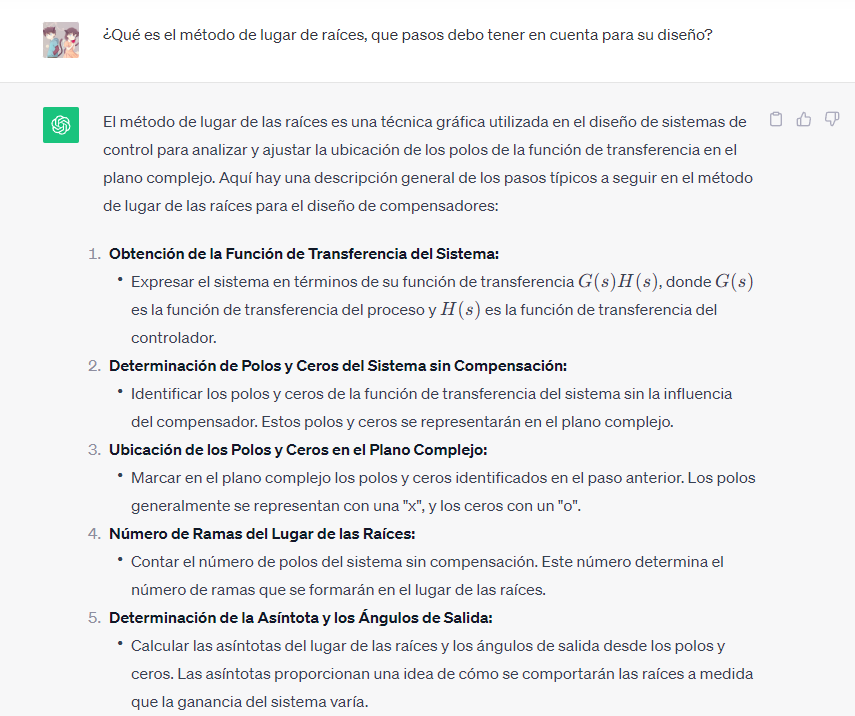
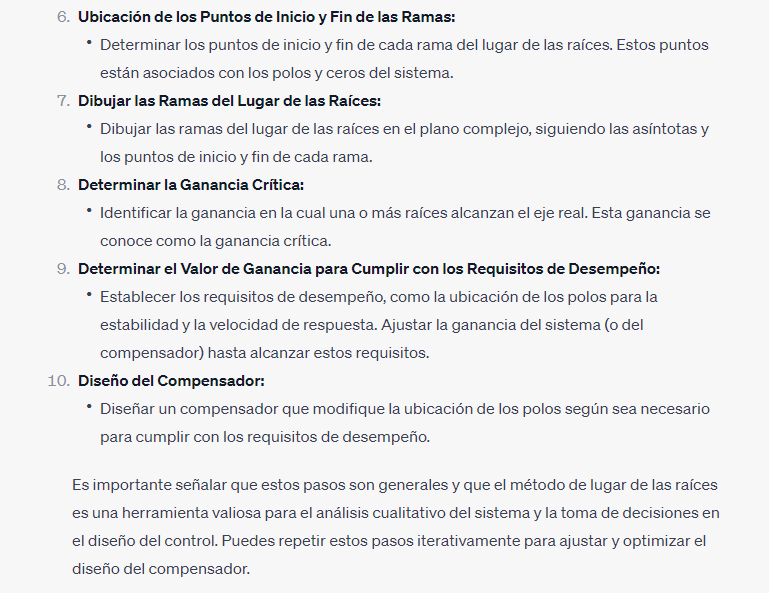

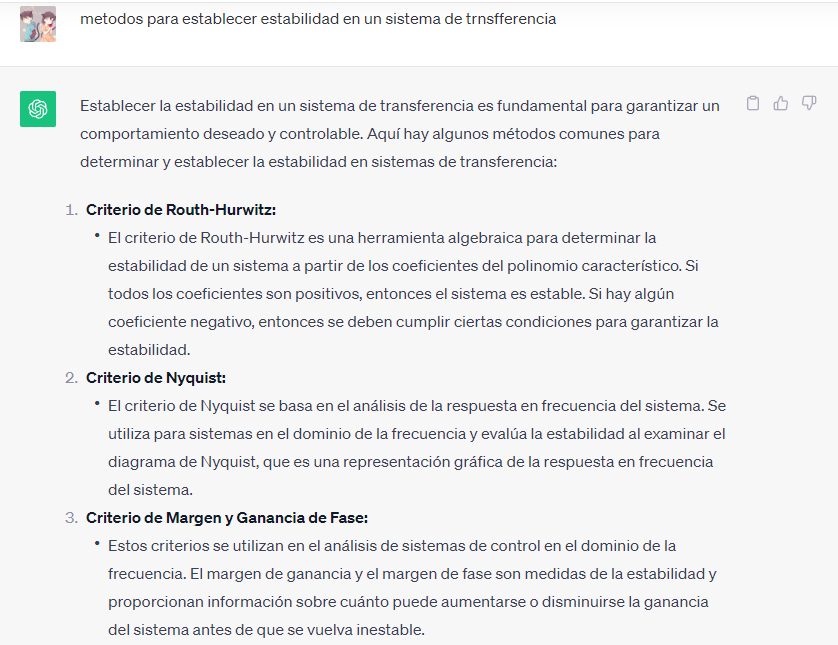
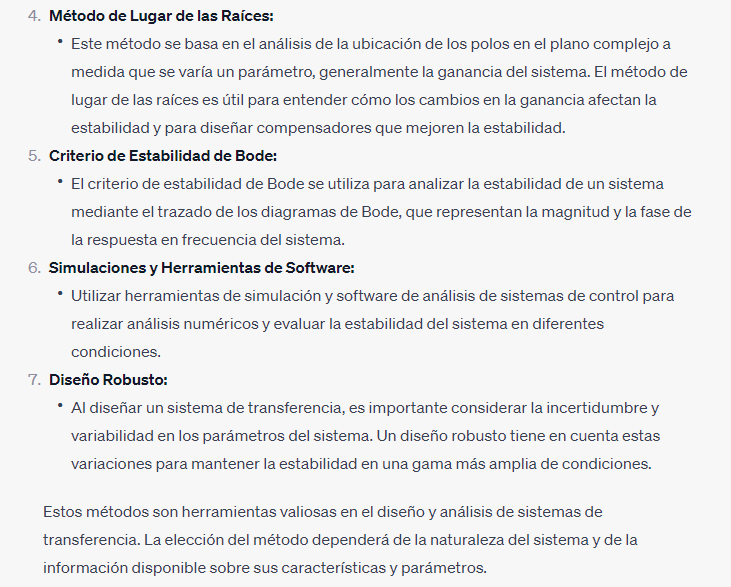

Después se le solicitó a ChatGPT lo siguiente: \\
"Diseñe un código en python colab donde se visualice el método de lugar de raíces de un horno en un sistema de control que  trabaja con la siguiente función de transferencia G(s)=10^6/(s+7200s+12.96+10^6)  y tiene un compensador PID ." \\
Aunque el primer codigo que proporcionó no fue del todo correcto porque obteniamos error al ejcutar en el entorno. Tras varias preguntas de prueba y error, obtuvimos el siguiente código:

In [ ]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.9 MB/s eta 0:00:00


Punto de ruptura: -3600.000000000001 + 0.0j
Ganancia en el punto de ruptura: 0.0


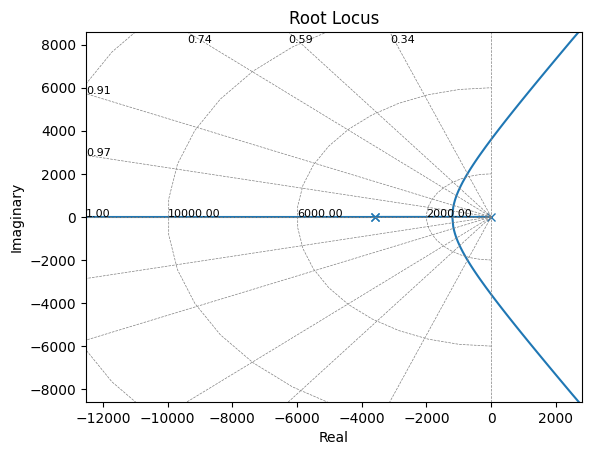

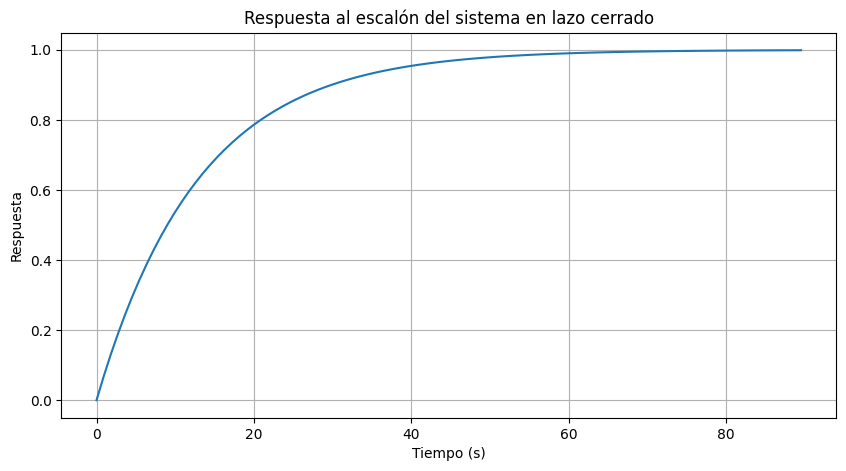

In [ ]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Definir la función de transferencia del sistema sin controlador
numerator = [10**6]
denominator = [1, 7200, 12.96* 10**6]
sys = ctrl.TransferFunction(numerator, denominator)

# Establecer manualmente los parámetros PID
kp = 0
ki = 1
kd = 0

# Crear el controlador PID
controller = ctrl.TransferFunction([kd, kp, ki], [1, 0])

# Sistema en lazo cerrado
system_closed_loop = ctrl.feedback(controller * sys)

# Mostrar el método de lugar de raíces
ctrl.root_locus(controller * sys)

# Extraer información sobre el punto de ruptura
breakpoint_index = np.argmax(rlocus_data[0][0].imag)  # Índice del punto de ruptura
breakpoint = rlocus_data[0][0][breakpoint_index]  # Coordenadas del punto de ruptura
breakpoint_gain = rlocus_data[1][breakpoint_index]  # Ganancia asociada al punto de ruptura
print(f"Punto de ruptura: {breakpoint.real} + {breakpoint.imag}j")
print(f"Ganancia en el punto de ruptura: {breakpoint_gain}")


# Graficar la respuesta al escalón del sistema en lazo cerrado
time, response = ctrl.step_response(system_closed_loop)
plt.figure(figsize=(10, 5))
plt.plot(time, response)
plt.title('Respuesta al escalón del sistema en lazo cerrado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()

Después se le solicitó un analsis de la estabilidad por diferentes métodos:

Polos del sistema en lazo cerrado: [-3.61662831e+03+0.j -3.58329453e+03+0.j -7.71638017e-02+0.j]
El sistema es estable por análisis de polos.

El sistema es estable por el criterio de Nyquist.

Ganancia de margen: 93311.0, Fase de margen: inf grados.
El sistema es estable por análisis de margen.



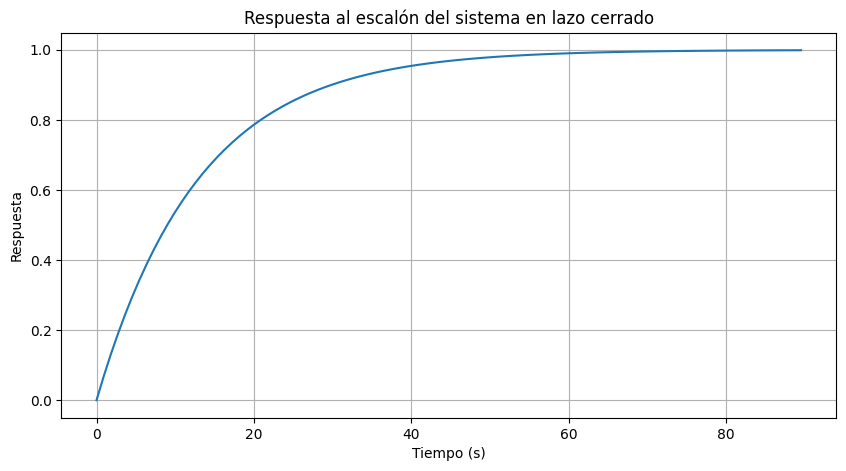

In [ ]:
# Verificar la estabilidad por análisis de polos
poles = ctrl.pole(system_closed_loop)
print("Polos del sistema en lazo cerrado:", poles)
if all(np.real(poles) < 0):
    print("El sistema es estable por análisis de polos.\n")
else:
    print("El sistema no es estable por análisis de polos.\n")

# Verificar la estabilidad por criterio de Nyquist
magnitude, phase, omega = ctrl.bode(system_closed_loop, Plot=False)
if all(magnitude > 0) and all(np.diff(phase) <= 180):
    print("El sistema es estable por el criterio de Nyquist.\n")
else:
    print("El sistema no es estable por el criterio de Nyquist.\n")

# Verificar la estabilidad por análisis de margen
gm, pm, _, _ = ctrl.margin(system_closed_loop)
if gm is not None and pm is not None:
    print(f"Ganancia de margen: {gm}, Fase de margen: {pm} grados.")
    if gm > 1 and pm > 0:
        print("El sistema es estable por análisis de margen.\n")
    else:
        print("El sistema no es estable por análisis de margen.\n")
else:
    print("No se pudo determinar el margen de ganancia y fase.\n")

# Graficar la respuesta al escalón del sistema en lazo cerrado
time, response = ctrl.step_response(system_closed_loop)
plt.figure(figsize=(10, 5))
plt.plot(time, response)
plt.title('Respuesta al escalón del sistema en lazo cerrado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.grid(True)
plt.show()


**Conclusión** \\
 La aplicación de inteligencia artificial (IA) ha demostrado ser una herramienta invaluable para mejorar y reemplazar simulaciones previamente realizadas en MATLAB, transfiriéndolas a otro lenguaje de programación como Python. La transición de MATLAB a Python con la ayuda de la inteligencia artificial no solo implica una migración tecnológica, sino también una adaptación a un ecosistema más dinámico y colaborativo.